<a href="https://colab.research.google.com/github/faislayy/CNN-Digit-Recognition/blob/main/Image_recognition_by_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as ps
import tensorflow as tf
from tensorflow import keras

In [2]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


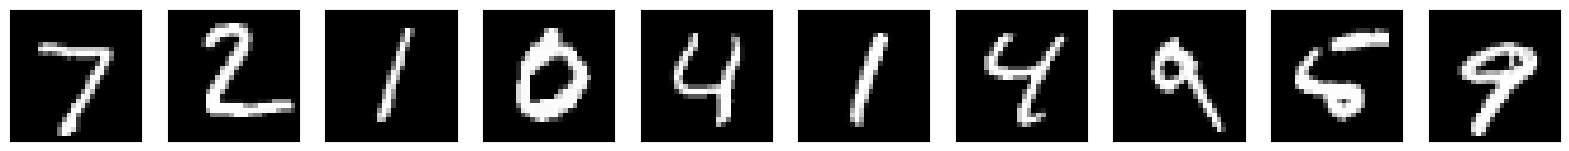

In [4]:
import matplotlib.pyplot as plt

n=10

plt.figure(figsize=(20,4))

for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(X_test[i].reshape(28,28))

    plt.gray()

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


plt.show()
plt.close()

In [5]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("Y_train shape: {}".format(Y_train.shape))
print("Y_test shape: {}".format(Y_test.shape))

X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)
Y_train shape: (60000,)
Y_test shape: (10000,)


In [6]:
X_train =X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

In [7]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

X_train /= 255
X_test /= 255

In [8]:
from keras.utils import to_categorical

Y_train = to_categorical(Y_train, num_classes=10)
Y_test = to_categorical(Y_test, num_classes=10)

In [9]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("Y_train shape: {}".format(Y_train.shape))
print("Y_test shape: {}".format(Y_test.shape))

X_train shape: (60000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)
Y_train shape: (60000, 10)
Y_test shape: (10000, 10)


In [10]:
classes = 10

img_rows, img_cols, channels = 28, 28, 1

filters = [6, 32, 80, 120]

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [12]:
model = Sequential()

model.add(Conv2D(filters[0],(3,3), padding="same", activation="relu", input_shape=(img_rows, img_cols, channels)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters[1],(2,2), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters[2],(2,2), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters[3],(2,2), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dense(classes, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         60        
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        800       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 80)          10320     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 80)          0

In [13]:
from time import time

tic = time()

model.fit(X_train, Y_train, batch_size=64, epochs=15, verbose=1)

toc = time()

print("Total time taken to train model is {} sec".format(toc-tic))

Epoch 1/15
938/938 [==============================] - 15s 6ms/step - loss: 1.7008 - accuracy: 0.4546
Epoch 2/15
938/938 [==============================] - 5s 5ms/step - loss: 0.3699 - accuracy: 0.8809
Epoch 3/15
938/938 [==============================] - 6s 6ms/step - loss: 0.2024 - accuracy: 0.9360
Epoch 4/15
938/938 [==============================] - 5s 5ms/step - loss: 0.1469 - accuracy: 0.9535
Epoch 5/15
938/938 [==============================] - 5s 5ms/step - loss: 0.1135 - accuracy: 0.9632
Epoch 6/15
938/938 [==============================] - 5s 5ms/step - loss: 0.0955 - accuracy: 0.9695
Epoch 7/15
938/938 [==============================] - 4s 5ms/step - loss: 0.0820 - accuracy: 0.9743
Epoch 8/15
938/938 [==============================] - 5s 5ms/step - loss: 0.0735 - accuracy: 0.9768
Epoch 9/15
938/938 [==============================] - 5s 5ms/step - loss: 0.0663 - accuracy: 0.9785
Epoch 10/15
938/938 [==============================] - 4s 5ms/step - loss: 0.0600 - accuracy: 0.981

In [14]:
from sklearn.metrics import accuracy_score

pre = model.predict(X_test)
pred = np.where(pre> 0.5, 1, 0)

accuracy = accuracy_score(pred, Y_test)

print("Model Accuracy is {}".format(accuracy))



313/313 [==============================] - 1s 2ms/step
Model Accuracy is 0.9842


In [15]:
mask = range(20,60)

X_valid = X_test[30:50]

prob = model.predict(X_valid)
prediction = np.where(prob> 0.5, 1, 0)

1/1 [==============================] - 0s 115ms/step


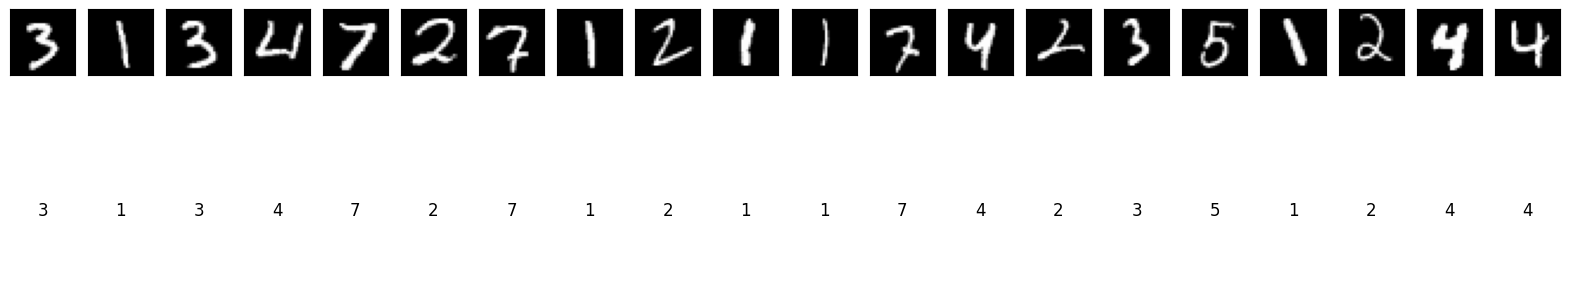

In [16]:
n = len(X_valid)

plt.figure(figsize=(20,4))

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(X_valid[i].reshape(28,28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    digit = np.argmax(prediction[i])
    plt.subplot(2,n,i+n+1)
    plt.text(0.5,0.5,str(digit), fontsize=12, ha="center", va="center")
    plt.axis("off")


plt.show()
plt.close()